In [1]:
import numpy as np
from skimage import io, img_as_ubyte
from skimage.restoration import denoise_nl_means, estimate_sigma
import matplotlib.pyplot as plt

In [3]:
# Load the input image
image = io.imread("../monalisa_noisy.jpg")

In [4]:
# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(image, channel_axis=-1))
sigma_est

17.664111170547375

In [5]:
#Define a dictionary for the input parameters to NLM algorithm.
patch_kw = dict(patch_size=10,      # 5x5 patches
                patch_distance=3,  # 13x13 search area
                multichannel=True)


In [7]:
# Denoise the image
denoised_image = denoise_nl_means(image, patch_size=5, patch_distance=10, fast_mode=True)

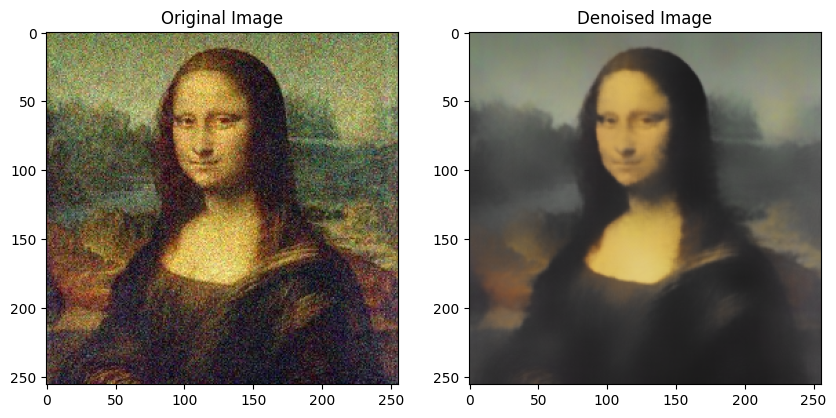

In [4]:
# Plot Orginal and Denoised Image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.show()

In [5]:
# The denoise image is float 64 type, so we need to convert to 8 byte, for desktop viewing.
denoise_img_as_8byte = img_as_ubyte(denoised_image)

In [6]:
# Save the denoised image
io.imsave("denoised_monalisa.jpg", denoise_img_as_8byte)